# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-01-18 20:05:54--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.224.146.81, 13.224.146.60, 13.224.146.5, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.224.146.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97812 (96K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  95.52K  --.-KB/s    in 0.03s   

2022-01-18 20:05:54 (3.04 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [97812/97812]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(733, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-13,18673,328,85,10,86,24,40,61,177,196,...,150,22,699,144,160,296,87,100,115,1817
2022-01-14,21891,467,97,29,76,27,33,50,249,199,...,220,36,800,121,163,390,92,88,140,1596
2022-01-15,25630,695,143,23,106,31,39,51,256,203,...,158,26,1098,171,207,413,108,137,166,1829
2022-01-16,25483,692,129,14,79,38,26,66,253,190,...,213,29,1290,132,180,435,144,142,148,1226
2022-01-17,20835,643,86,11,44,43,39,69,318,220,...,113,16,950,133,172,366,138,93,123,530


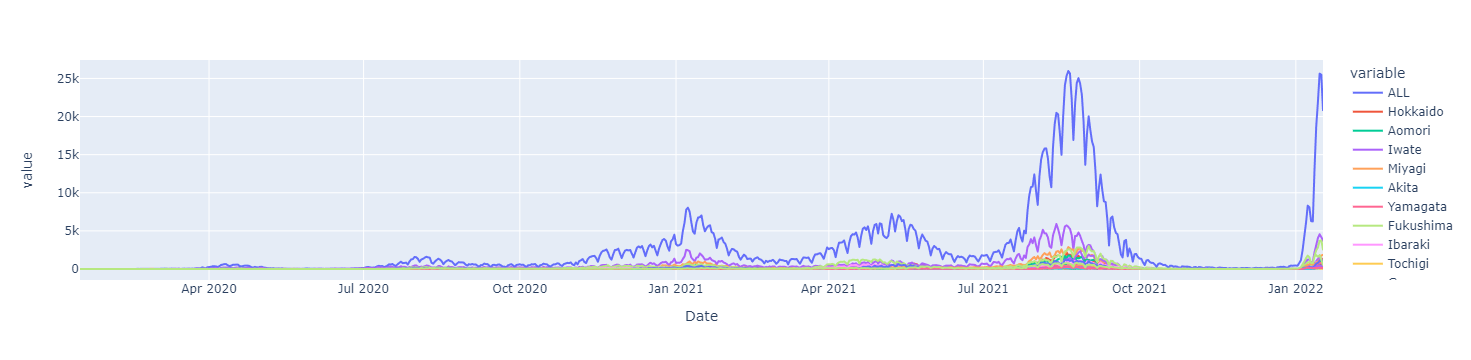

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(105, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-19,148.285714,8.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,1.142857,1.571429,...,0.000000,0.000000,2.571429,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.571429
2021-12-26,223.857143,20.714286,0.000000,0.000000,0.285714,0.000000,0.142857,2.714286,1.428571,5.285714,...,0.000000,0.000000,10.857143,0.428571,0.857143,0.142857,0.000000,0.000000,1.428571,18.000000
2022-01-02,383.142857,20.857143,0.000000,0.857143,0.714286,0.000000,0.142857,2.285714,1.714286,12.285714,...,0.000000,0.142857,7.142857,0.857143,0.428571,0.000000,0.000000,0.000000,0.714286,36.142857
2022-01-09,4455.285714,70.285714,7.571429,5.142857,12.857143,0.857143,5.000000,15.714286,42.857143,41.428571,...,17.428571,4.571429,104.571429,25.428571,17.857143,25.857143,11.285714,8.571429,69.571429,951.857143
2022-01-16,16748.714286,371.714286,80.714286,12.285714,60.428571,22.428571,28.714286,43.857143,165.142857,150.285714,...,136.142857,20.142857,665.285714,113.428571,129.428571,270.857143,76.285714,76.000000,124.285714,1380.857143


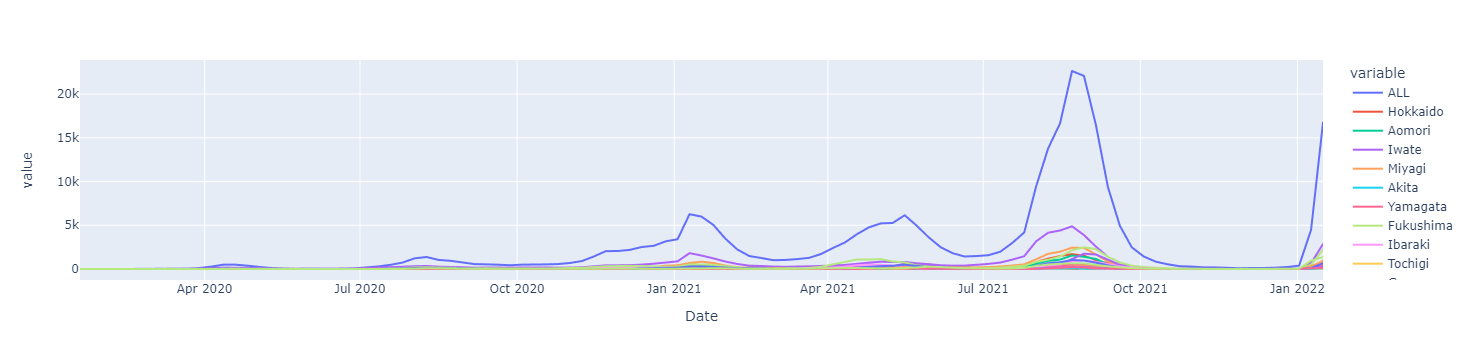

In [7]:
px.line(df_gr,)

## functions

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(1, 2)
P = D = Q = range(1, 2)
s = range(4, 32)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
#PDQs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, s))]

In [9]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_params = [0, 0, 10000000]
    best_result = None
    for order in pdq:
        for seasonal_order in PDQs:
            try:
                model = SARIMAX(ts_train,
                              order = order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                result = model.fit(disp=False)

                if result.aic < best_params[2] and not result.aic < 100:
                    best_params = [order, seasonal_order, result.aic]
                    best_result = result
                    print('order{}, s_order{} - AIC: {}'.format(order, seasonal_order, result.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                return
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(order, seasonal_order))
                continue

    print('Best AIC model:', best_params)
    
    return best_result

In [10]:
%%time
result_all = gridSearch(df_gr.ALL)

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: 1601.4489139822456
Best AIC model: [(1, 1, 1), (1, 1, 1, 12), 1601.4489139822456]
CPU times: user 8.79 s, sys: 32.9 s, total: 41.6 s
Wall time: 3.82 s


In [11]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result_all = model.fit(disp=False)
result_all.aic

1601.4489139822456

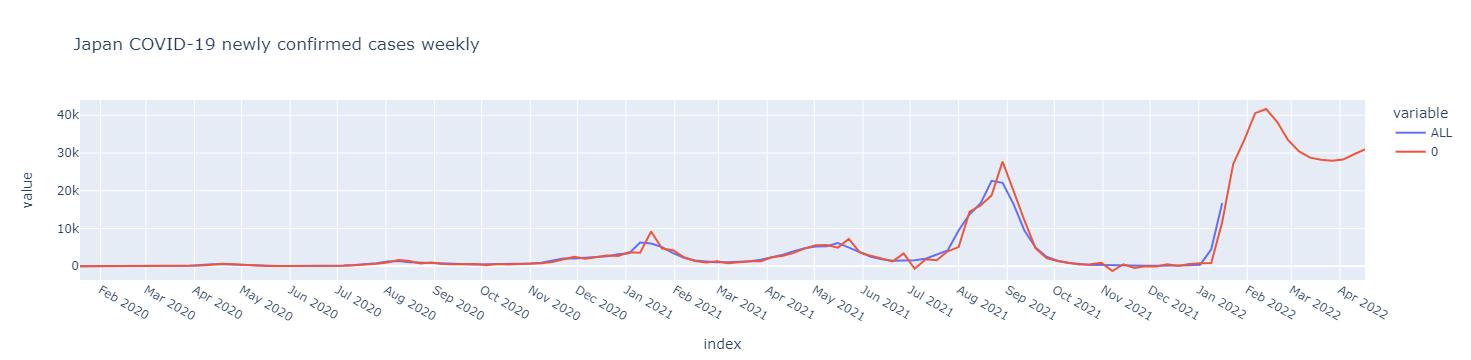

In [12]:
ts_forecast = result_all.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))

temp_df = df_gr.ALL.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])
fig = px.line(temp_df, title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [13]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result_tokyo = model.fit(disp=False)
result_tokyo.aic

1329.9563851482617

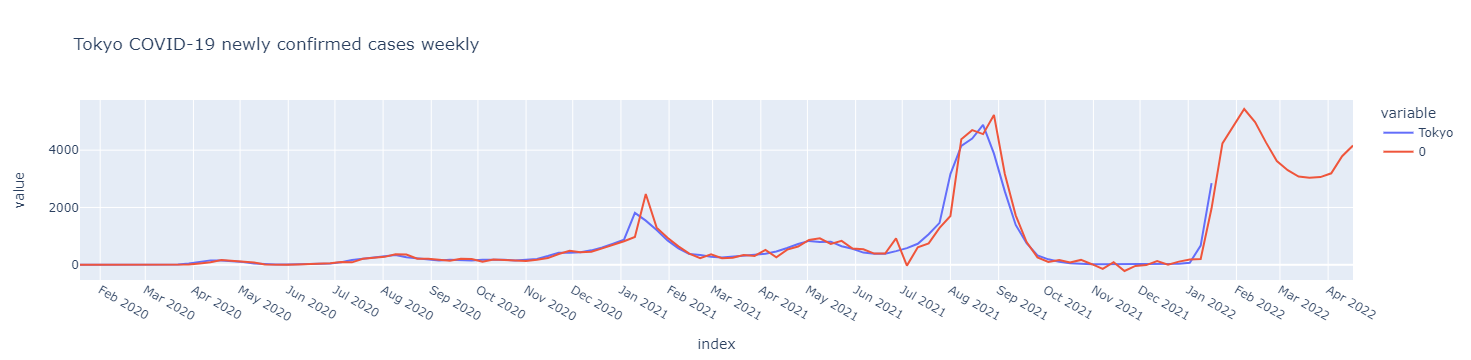

In [14]:
ts_forecast = result_tokyo.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))
temp_df = df_gr.Tokyo.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])

fig = px.line(temp_df, title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()